# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset contains a Brazilian record of 110,527 scheduled doctor appointments from 04/29/2016 to 06/08/2016. I will be exploring the dataset to see if there is a correlation between SMS reminders and the appoinent's day of the week with the patients no showing for their appointments. 

#### Dataset Variables:

>**PatientId:** Unique patient identification number  
**AppointmentID**: Unique appointment number  
**Gender**: Male or Female  
**ScheduledDay**: Day patient called to make the appointment  
**AppointmentDay**: Day of the appointment  
**Age**: Patient's age  
**Neighbourhood**: Location of the hospital where the appointment takes place  
**Hipertension**: Hypertension patient or not  
**Diabetes**: Diabetes patient or not  
**Alcoholism**: Alcohol addiction or not  
**Handicap**: Handicaped or not  
**SMS_received**: Patient receive an SMS appointment reminder or not  
**No-show**:'No' if the patient showed up to their appointment and 'Yes' if they did not show.



### Question(s) for Analysis

The dependent value for the analysis will be the No-show column. AppointmentDay, SMS-received and PatientID will be the independent values. 

>Q1: Which day(s) are clients more likely to be a no show?  
Q2: Is there a correlation betwen no shows and not receiving an SMS reminder?

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
!pip install -U numpy

<a id='wrangling'></a>
## Data Wrangling

### General Purpose

In [6]:
# load dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.to_csv('df_backup.csv', index = False)

In [7]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
# get number of rows and columns

df.shape

(110527, 14)

In [9]:
# column names; variables

df.columns

# observation: Hipertension and Handcap misspelled. Mixed naming conventions.

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# summary of statistics

df.describe()

# observation: min Age is -1. 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
# quick overview of variables and data types (dtypes)

df.info()

# observations: ScheduledDay and AppointmentDay are object dtypes. No missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
# further investigate ScheduledDay dtype

type(df['ScheduledDay'][0])

# observation: will need to be converted to datetime

str

In [13]:
# further investigate AppointmentDay dtype

type(df['AppointmentDay'][0])

# observation: will need to be converted to datetime

str

### Value Checks: Null, Duplicate and Unique

In [14]:
# check for null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [15]:
# check for duplicate rows

df.duplicated().sum()

0

In [16]:
# check number of PatientIds that appear more than once

df.PatientId.duplicated().sum()

48228

In [17]:
# check how many of the duplicated PatientIds also have duplicated No-show results
# remove during cleaning to avoid over/under inflation of statistics

df[['PatientId', 'No-show']].duplicated().sum()

38710

In [18]:
# check the number of unique values in each column

df.nunique()

# observations: More AppointmentIds than unique PatientIds. More ScheduledDays than AppointmentDays. 
#               Age has 104 unique values. Handcap has 5 unique values, not 2. 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Create: Rough Analysis Dataframe

In [19]:
# create smaller and revelant dataframe for analysis

df = df[['PatientId', 'AppointmentID','ScheduledDay', 'AppointmentDay', 'SMS_received', 'No-show']].copy()

df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,No
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,No
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,No
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,No
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,No


### Conversions: Datetime, (0,1) to Yes/No

In [20]:
# convert ScheduledDay from str to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [21]:
# convert AppointmentDay from str to datetime

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [22]:
# confirm datetime conversions

df[['ScheduledDay', 'AppointmentDay']].dtypes

ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
dtype: object

In [23]:
# split ScheduledDay into date and time, add to dataframe as separate columns

df['date_scheduled'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['time_scheduled'] = pd.to_datetime(df['ScheduledDay']).dt.time

In [24]:
# split AppointmentDay into date and time, add to dataframe as separate columns

df['appt_day'] = pd.to_datetime(df['AppointmentDay']).dt.date 
df['appt_time'] = pd.to_datetime(df['AppointmentDay']).dt.time

In [25]:
# create weekday column for AppointmentDay

df['weekday'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

In [26]:
# converts 0,1 boolean to Yes, No str
df['SMS_received'] = df['SMS_received'].map({True:'Yes' ,False:'No'})


# https://www.geeksforgeeks.org/replace-the-column-contains-the-values-yes-and-no-with-true-and-false-in-python-pandas/

In [27]:
# check on split and added columns

df.head(1)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show,date_scheduled,time_scheduled,appt_day,appt_time,weekday
0,2.987250e+13,5642903,2016-04-29 18:38:08,2016-04-29,No,No,2016-04-29,18:38:08,2016-04-29,00:00:00,Friday


### Streamline Analysis Dataframe

In [28]:
# drop columns no longer needed

df.drop(columns=(['ScheduledDay','AppointmentDay']),inplace=True)

In [29]:
# reorder columns to be more intuitive

df = df[['PatientId', 'AppointmentID', 'date_scheduled', 'time_scheduled', 'SMS_received',
        'appt_day', 'appt_time', 'weekday', 'No-show' ]]

In [30]:
# use underscore and lower case naming conventions for all column names and rename SMS_received for clarification

df.rename(columns = {'PatientId':'patient_id', 
                     'AppointmentID':'appt_id', 
                     'SMS_received':'sms_reminder',
                     'No-show':'no_show'}, inplace = True)

df.head(3)

,patient_id,appt_id,date_scheduled,time_scheduled,sms_reminder,appt_day,appt_time,weekday,no_show
0,2.987250e+13,5642903,2016-04-29,18:38:08,No,2016-04-29,00:00:00,Friday,No
1,5.589978e+14,5642503,2016-04-29,16:08:27,No,2016-04-29,00:00:00,Friday,No
2,4.262962e+12,5642549,2016-04-29,16:19:04,No,2016-04-29,00:00:00,Friday,No


In [31]:
# check unique values for current df

df.nunique()

# observation: appt_time only has one value; investigate and remove time columns if irrelevant.

patient_id         62299
appt_id           110527
date_scheduled       111
time_scheduled     37109
sms_reminder           2
appt_day              27
appt_time              1
weekday                6
no_show                2
dtype: int64

In [32]:
# explore appt_time; confirm single time value

df['appt_time'].value_counts()

00:00:00    110527
Name: appt_time, dtype: int64

The [No Show](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/340475) dataset's information page was reveiwed for information on this anomaly. The single value for appt_time makes time columns irrelevant for the analysis and need to be removed.

In [33]:
# drop time_scheduled and appt_time columns; no longer relevant; can also date_scheduled

df.drop(columns=(['date_scheduled', 'time_scheduled','appt_time']),inplace=True)


df.head(1)

,patient_id,appt_id,sms_reminder,appt_day,weekday,no_show
0,2.987250e+13,5642903,No,2016-04-29,Friday,No


### Create: Main Analysis Dataframe

In [34]:
# create and save main analysis (basic structure) as csv backup with new name

df.to_csv('df_main_ns_backup.csv', index = False)

## Data Cleaning

In [35]:
# inspect main analysis dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 6 columns):
patient_id      110527 non-null float64
appt_id         110527 non-null int64
sms_reminder    110527 non-null object
appt_day        110527 non-null object
weekday         110527 non-null object
no_show         110527 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [36]:
# check for duplicates in analysis dataframe

df.duplicated().sum()

0

#### Remove duplicates - rows (cleaning)

In [37]:
# drop the PatientId, No-show duplicates to avoid under/over inflating of no show statistics

df.drop_duplicates(['patient_id','no_show'],inplace=True)

In [38]:
# now that patient_id and no_show duplicates are dropped remove patient_id; remove appt_day, not needed.

df.drop(columns=(['patient_id', 'appt_day']),inplace=True)

In [39]:
df.head(1)

,appt_id,sms_reminder,weekday,no_show
0,5642903,No,Friday,No


In [ ]:
df.to_csv('df_exploratory_backup.csv')

In [2]:
df = pd.read_csv('df_exploratory_backup.csv')

In [40]:
# check unique values in main analysis dataframe

df.nunique()

# observation: appointments take place 6 days a week. 

appt_id         71817
sms_reminder        2
weekday             6
no_show             2
dtype: int64

In [41]:
# explore weekday

df['weekday'].value_counts()

# observations: Sunday is missing and Saturday has a significantly lower appointment count

Tuesday      17089
Wednesday    15936
Monday       15108
Friday       12598
Thursday     11058
Saturday        28
Name: weekday, dtype: int64

Note: [Sunday](https://www2.deloitte.com/br/en/pages/living-and-working/articles/labor-relations.html) is normally a day off in Brazil and work is normally limited to [4 hours](https://thebrazilbusiness.com/article/brazilian-employment-law-in-a-nutshell) on Saturday. 

<a id='eda'></a>
## Exploratory Data Analysis

#### Exploration: Total Values

In [3]:
# Create: df of total statistics by weekday, displaying appt_id, sms_reminder and no_show columns.

df_all_appt = df[['appt_id','sms_reminder', 'weekday','no_show']].copy().set_index('weekday')

In [43]:
print('\nTotal Appt ID, SMS & No Show Values\n  By Weekday')

df_all_appt.head()


Total Appt ID, SMS & No Show Values
  By Weekday


,appt_id,sms_reminder,no_show
weekday,,,
Friday,5642903,No,No
Friday,5642503,No,No
Friday,5642549,No,No
Friday,5642828,No,No
Friday,5642494,No,No


In [4]:
# Create: further breakdown and "dummies" for yes/no values (boolean)

df_all = df[['appt_id', 'sms_reminder','no_show']].copy()

# create get_dummies breakdown by appt_id for sms received (y/n) and no show (y/s)
df_all_yn = pd.get_dummies(df_all.set_index('appt_id')).sum(level=0)

#renaming columns to be more descriptive of content
df_all_yn.rename(columns = {'sms_reminder_No':'no_sms', 
                     'sms_reminder_Yes':'recd_sms', 
                     'no_show_No':'kept_appt',
                     'no_show_Yes':'no_show'}, inplace = True)

In [45]:
print('\nTotal SMS & No Show Values\n  Separated into Yes/No columns by Appoitment Id\n  (True = 1, False = 0)')

df_all_yn.head()


Total SMS & No Show Values
  Separated into Yes/No columns by Appoitment Id
  (True = 1, False = 0)


,no_sms,recd_sms,kept_appt,no_show
appt_id,,,,
5642903,1,0,1,0
5642503,1,0,1,0
5642549,1,0,1,0
5642828,1,0,1,0
5642494,1,0,1,0


In [5]:
# Creation: SMS/No SMS and Showed/No Show totals by day

df_all_table = df[['weekday', 'sms_reminder','no_show']].copy()

# create get_dummies breakdown by appt_id for sms received (y/n) and no show (y/s)
df_all_yn_table = pd.get_dummies(df_all_table.set_index('weekday')).sum(level=0)

#renaming columns to be more descriptive of content
df_all_yn_table.rename(columns = {'sms_reminder_No':'no_sms', 
                     'sms_reminder_Yes':'recd_sms', 
                     'no_show_No':'kept_appt',
                     'no_show_Yes':'no_show'}, inplace = True)

In [47]:
df_all_yn_table.head(7)

,no_sms,recd_sms,kept_appt,no_show
weekday,,,,
Friday,9505.0,3093.0,9383.0,3215.0
Tuesday,9925.0,7164.0,13014.0,4075.0
Monday,10314.0,4794.0,11305.0,3803.0
Wednesday,10168.0,5768.0,12032.0,3904.0
Thursday,7787.0,3271.0,8398.0,2660.0
Saturday,19.0,9.0,22.0,6.0


I found this discussion helpful

[Change df index](https://www.geeksforgeeks.org/how-to-change-index-values-in-pandas/)

In [6]:
# Appointments: total number scheduled

total_appts = df_all_appt['appt_id'].count()

total_appts

71817

In [7]:
# No Shows:  total number of patients who No Showed

total_ns =  df_all_appt['no_show'].value_counts()['Yes']

total_ns

17663

In [8]:
# Showed: total number of patients who showed

total_showed = total_appts - total_ns

total_showed

54154

In [9]:
# Showed with SMS Reminders: total number of kept appointments that also received an sms reminder
# Create: df with only showed
# Then, drill down to find patients who also received an sms reminder

show_with_sms1 = (df_all_appt.loc[df_all_appt['no_show'] == 'No']) 
show_with_sms = (show_with_sms1.loc[show_with_sms1['sms_reminder'] == 'Yes']) 

total_show_sms_yes = show_with_sms['appt_id'].count()

total_show_sms_yes

16096

In [10]:
# Showed and No SMS Reminders: total number of kept appointments that did not receive an SMS reminder
# Create: df with only showed
# Then, drill down to find patients who did not received an sms reminder

show_with_sms1_no = (df_all_appt.loc[df_all_appt['no_show'] == 'No']) 
show_with_sms_no = (show_with_sms1_no.loc[show_with_sms1_no['sms_reminder'] == 'No']) 

total_show_sms_no = show_with_sms_no['appt_id'].count()

total_show_sms_no

38058

In [11]:
# SMS Received:  total number of patients who received SMS Messages

total_sms = df_all_appt['sms_reminder'].value_counts()['Yes']

total_sms

24099

In [12]:
# No Shows with SMS Reminders: total number of no show patients that also received an sms reminder
# Create: df with only no shows
# Then, drill down to find patients who also received an sms reminder

ns_with_sms1 = (df_all_appt.loc[df_all_appt['no_show'] == 'Yes']) 
ns_with_sms = (ns_with_sms1.loc[ns_with_sms1['sms_reminder'] == 'Yes']) 

total_ns_sms_yes = ns_with_sms['appt_id'].count()

total_ns_sms_yes

8003

In [13]:
# No Showed and No SMS Reminders: total number of no show appointments that did not receive an SMS reminder
# Create: df with only no showed
# Then, drill down to find patients who did not received an sms reminder

ns_with_sms1_no = (df_all_appt.loc[df_all_appt['no_show'] == 'Yes']) 
ns_with_sms_no = (ns_with_sms1_no.loc[ns_with_sms1_no['sms_reminder'] == 'No']) 

total_ns_sms_no = ns_with_sms_no['appt_id'].count()

total_ns_sms_no

9660

In [14]:
# No shows: total percent of patients who failed to keep their appt

total_perc_ns = total_ns/total_appts

print(('Total No Show: {:.1%}').format(total_perc_ns))

Total No Show: 24.6%


In [15]:
# SMS Reminder: total percent of patients who recevied an sms reminder

total_perc_sms = total_sms/total_appts

print(('Total Recd SMS: {:.1%}').format(total_perc_sms))

Total Recd SMS: 33.6%


In [16]:
#Total percent of Showed w/o SMS

total_perc_show_nosms = (total_show_sms_no / total_appts)
print(('Total Showed w/o SMS: {:.1%}').format(total_perc_show_nosms))

Total Showed w/o SMS: 53.0%


In [17]:
#Total percent of Showed w/ SMS 

total_perc_show_sms = (total_show_sms_yes / total_appts)
print(('Total Showed w/ SMS: {:.1%}').format(total_perc_show_sms))

Total Showed w/ SMS: 22.4%


In [18]:
# No Shows w/o SMS Reminder: total percent of patients who failed to keep their appt and did not get an sms reminder

total_perc_ns_nosms = total_ns_sms_no / total_ns

print(('Total No Showed w/o SMS: {:.1%}').format(total_perc_ns_nosms))

Total No Showed w/o SMS: 54.7%


In [19]:
# No Shows and SMS Reminder: total percent of patients who failed to keep their appt and got an sms reminder

total_perc_ns_sms = total_ns_sms_yes / total_ns

print(('Total No Showed w/ SMS: {:.1%}').format(total_perc_ns_sms))

Total No Showed w/ SMS: 45.3%


In [20]:
# FUNCTION: find overall weekday no show percentage
# Can be used with x = individual day or in FUNCTION wkd_ns_perc_all for full summary

def wkd_ns_perc(x):
    # x = weekday
    
    # df for no shows by day
    ns_yes = len(df[(df['weekday'] == x) & (df['no_show'] == 'Yes')]) 
    
    # no show percent of all appointments
    ns_percent_all = ns_yes/71817 #total num of appts
     
    print(('    {} No Show:{:.1%}').format(x, ns_percent_all))                     

In [63]:
#FUNCTION: weekday no show percentage summary using function wkd_ns_perc

def wkd_ns_perc_all():

    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

    for x in weekdays:
        wkd_ns_perc(x)
            
wkd_ns_perc_all()

    Monday No Show:5.3%
    Tuesday No Show:5.7%
    Wednesday No Show:5.4%
    Thursday No Show:3.7%
    Friday No Show:4.5%
    Saturday No Show:0.0%


#### Function: Total Statistics

In [64]:
# Summary: Total Stats
# Create: function to recall stats when needed

def total_stats():
    
    print(('\nTotal Statitics for Appointments:\n    Total Num Appts: {}\n').format(total_appts))    
    print(('Total No Shows: {}\n    Percentage No Shows: {:.1%}\n').format(total_ns, total_perc_ns))
    
    print(('Total No Show Weekday Percentages:'))
    wkd_ns_perc_all()
    
    print(('\nTotal SMS: {}\n    Percentage Recd SMS: {:.1%}\n    Percentage Recd SMS & No Showed: {:.1%}\n').format(total_sms, total_perc_sms, total_perc_ns_sms))    
    
total_stats()


Total Statitics for Appointments:
    Total Num Appts: 71817

Total No Shows: 17663
    Percentage No Shows: 24.6%

Total No Show Weekday Percentages:
    Monday No Show:5.3%
    Tuesday No Show:5.7%
    Wednesday No Show:5.4%
    Thursday No Show:3.7%
    Friday No Show:4.5%
    Saturday No Show:0.0%

Total SMS: 24099
    Percentage Recd SMS: 33.6%
    Percentage Recd SMS & No Showed: 45.3%



#### Charting: Total Values

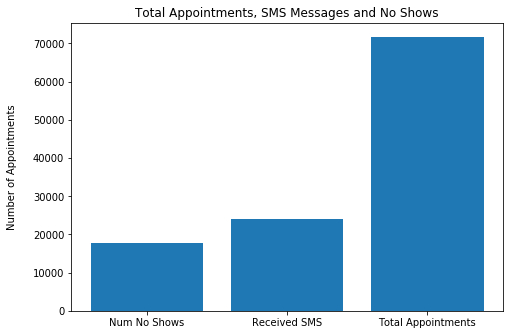

In [25]:
# Chart: Total Appointments, SMS Messages and No Shows

# values
stats = ['Total Appointments', 'Num No Shows', 'Received SMS']
values = [71817,17663,24099]

# plot 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(stats,values)
plt.ylabel('Number of Appointments\n')
plt.title('Total Appointments, SMS Messages and No Shows')
plt.show()

Design: Vertical bar chart showing total number of appointments, number of SMS messages received, and number of no shows. They were arranged as greatest to least (R-L) for easy reading. A blue color palatte was used so the visual was color blind friendly.


Discusion: There were a total of 71817 appointments made. The columns next to it give a visual of the number of SMS messages received (24099) and number of no shows (17663). 

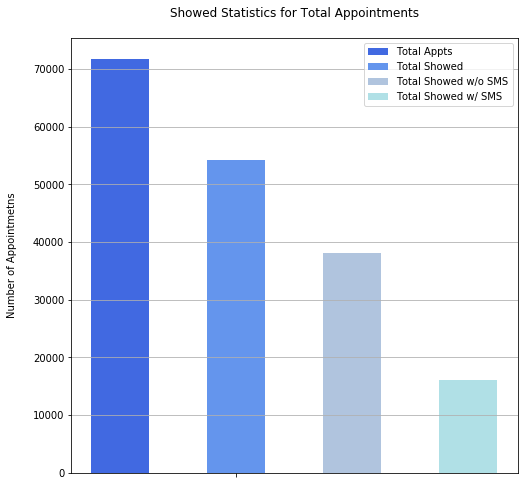

In [29]:
# Chart: Total Appointments, Showed, Showed w/o SMS, Showed w/SMS

# create data
x = np.arange(1)
total_appt = [71817]
total_show = [54154]
total_show_sms_no = [38058]
total_show_sms = [16096]


width = 0.1
  
# plot data in grouped manner of bar type
plt.figure(figsize=(8,8))
plt.ylabel('Number of Appointmetns\n')
plt.xticks(x, [''])
plt.grid(axis = 'y')
plt.bar(x - 0.2, total_appt, width, color='royalblue')
plt.bar(x, total_show, width, color='cornflowerblue')
plt.bar(x + 0.2, total_show_sms_no, width, color='lightsteelblue')
plt.bar(x + 0.4, total_show_sms, width, color='powderblue')
plt.title('Showed Statistics for Total Appointments\n')
plt.legend(['Total Appts','Total Showed', 'Total Showed w/o SMS', 'Total Showed w/ SMS']);

NOTE: I chose to include gridlines with some of my graphs/charts because I have poor eye sight. The gridlines help with reference points so I can better see and understand the values. 

Design: vertical bar chart showing Total appointments and "showed" values greatest to least (L-R). They were arranged as greatest to least for easy reading. An X axis label was not created since it would be redundant information due to the legend describing what each column/color represents. A blue color palatte was used so the visual was color blind friendly.

Discussion: Created a visual showing the total number of appointments and the breakdown of "showed" stats (showed, showed without SMS message, showed with SMS message) from greates to least. 

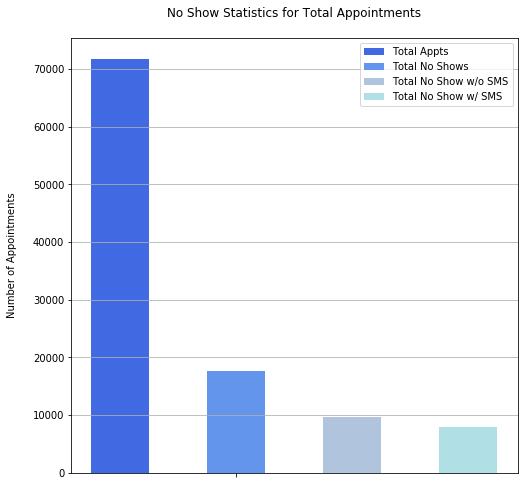

In [31]:
# Chart: Total Appointments, No Showed, No Showed w/o SMS, No Showed w/SMS

# create data
x = np.arange(1)
total_appt = [71817]
total_ns = [17663]
total_ns_no_sms = [9660]
total_ns_sms = [8003]

width = 0.1
  
# plot data in grouped manner of bar type
plt.figure(figsize=(8,8))
plt.xticks(x, [''])
plt.ylabel('Number of Appointments\n')
plt.grid(axis = 'y')
plt.bar(x - 0.2, total_appt, width, color= 'royalblue')
plt.bar(x, total_ns, width, color='cornflowerblue')
plt.bar(x + 0.2, total_ns_no_sms, width, color='lightsteelblue')
plt.bar(x + 0.4, total_ns_sms, width, color='powderblue')
plt.title('No Show Statistics for Total Appointments\n')
plt.legend(['Total Appts','Total No Shows', 'Total No Show w/o SMS', 'Total No Show w/ SMS']);


I found these discussion helpful:  
[Bar Plot](https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm), 
[What are the differences between add_axes and add_subplot?](https://stackoverflow.com/questions/43326680/what-are-the-differences-between-add-axes-and-add-subplot)


Design: vertical bar chart showing Total appointments and "no show" values greatest to least (L-R). They were arranged as greatest to least for easy reading. An X axis label was not created since it would be redundant information due to the legend describing what each column/color represents. A blue color palatte was used so the visual was color blind friendly.

Discussion: Created a visual showing the total number of appointments and the breakdown of "no show" stats (no show, no show without SMS message, no show with SMS message) from greates to least.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


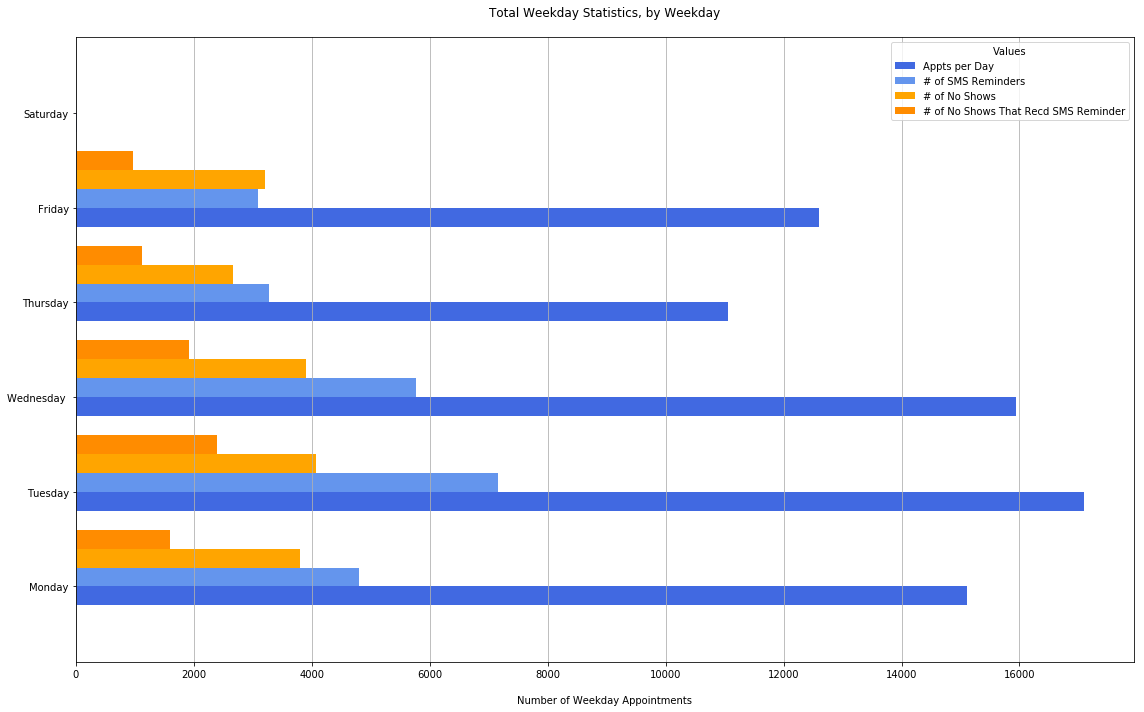

In [32]:
#Chart: Horizontal Stacked Bar - total weekday statistics (# appts, sms reminders, no shows, no shows/sms reminders)

df.hstacked_bar = pd.DataFrame(dict(graph=['Monday', 'Tuesday', 'Wednesday ', 'Thursday', 'Friday', 'Saturday'], 
                                    appts=[15108, 17089, 15936, 11058, 12598, 28], 
                                    ns=[3803, 4075, 3904, 2660, 3215, 6], 
                                    sms=[4794, 7164, 5768, 3271, 3093, 9 ], 
                                    nsms=[1600, 2387, 1925, 1122, 967, 1 ]))

#y labels, values (index of each make the bars)
width= 0.2 
padding = 0.2

#create tick locations
ind = np.arange(len(df.hstacked_bar)) * (width * 4 + padding) # label locations

#plotting
fig, ax = plt.subplots(figsize = (16,10))
                            
ax.barh(ind, df.hstacked_bar.appts, width, align='edge', color = 'royalblue', label = 'Appts per Day')
ax.barh(ind + width, df.hstacked_bar.sms, width, align='edge', color = 'cornflowerblue', label = '# of SMS Reminders')
ax.barh(ind + 2 * width, df.hstacked_bar.ns, width, align='edge', color = 'orange', label = '# of No Shows')
ax.barh(ind + 3 * width, df.hstacked_bar.nsms, width, align='edge', color = 'darkorange', label = '# of No Shows That Recd SMS Reminder')
ax.set(yticks=ind + width, yticklabels = df.hstacked_bar.graph, ylim = [2 * width - 1, len(df.hstacked_bar)])

ax.set_title('Total Weekday Statistics, by Weekday\n')
plt.xlabel('\nNumber of Weekday Appointments')
#plt.ylabel("Daily Values\n") -- redundant

plt.grid(axis = 'x')

ax.legend(title = 'Values')#upper right

plt.tight_layout()
plt.show;

Design: horizongal grouped bar chart showing the "show", "no show" and SMS values in realation to each other and total number of appointments. An X axis label was not created since it would be redundant information due to the legend describing what each column/color represents. A blue-orange color palatte was used so the visual was color blind friendly.

Discussion: Created a visual showing the total number of appointments, the breakdown of "showed" stats (showed, showed without SMS message, showed with SMS message) and their relation to each other from greates to least.

#### Exploration: Weekday Values

In [69]:
# No Shows: number of No Shows by day

ns_with_sms_table = (df_all_appt.loc[df_all_appt['no_show'] == 'Yes']).copy()
ns_with_sms_table.drop(columns=(['appt_id', 'sms_reminder']),inplace=True)
ns_with_sms_table.groupby('weekday').count()

,no_show
weekday,
Friday,3215
Monday,3803
Saturday,6
Thursday,2660
Tuesday,4075
Wednesday,3904


In [70]:
# Showed: number of kept apptointments by day

show_with_sms_table = (df_all_appt.loc[df_all_appt['no_show'] == 'No']).copy()
show_with_sms_table.drop(columns=(['appt_id', 'sms_reminder']),inplace=True)
show_with_sms_table.rename(columns = {'no_show' : 'showed'}, inplace = True)
show_with_sms_table.groupby('weekday').count()

,showed
weekday,
Friday,9383
Monday,11305
Saturday,22
Thursday,8398
Tuesday,13014
Wednesday,12032


In [71]:
# SMS Received: number of SMS Messages by day

ns_with_sms_table2 = (df_all_appt.loc[df_all_appt['sms_reminder'] == 'Yes']).copy()
ns_with_sms_table2.drop(columns=(['appt_id', 'no_show']),inplace=True)
ns_with_sms_table2.groupby('weekday').count()

,sms_reminder
weekday,
Friday,3093
Monday,4794
Saturday,9
Thursday,3271
Tuesday,7164
Wednesday,5768


I found these helpful: [How to Select a Subset](https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/03_subset_data.html), [Grouping and Count](https://stackoverflow.com/questions/67608121/how-to-groupby-and-count-binomial-variable-in-python-and-make-a-plot-of-this) 

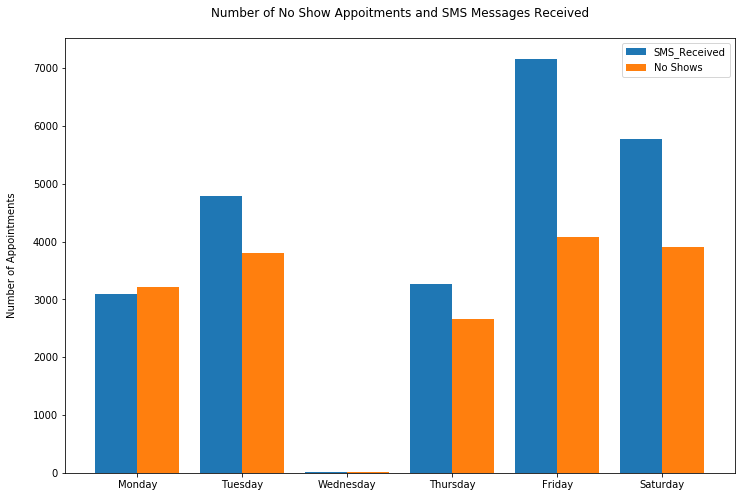

In [34]:
# Chart: Number of SMS Recevied and No Shows
  
# create data
x = np.arange(6)
sms_received = [3093, 4793, 9, 3271, 7164, 5768]
no_shows = [3215, 3803, 6, 2660, 4075, 3904]
width = 0.4
  
# plot data in grouped manner of bar type
plt.figure(figsize=(12,8))
plt.ylabel('Number of Appointments\n')
plt.xticks(x, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.bar(x-0.2, sms_received, width)
plt.bar(x+0.2, no_shows, width)
plt.title('Number of No Show Appoitments and SMS Messages Received\n')
plt.legend(['SMS_Received','No Shows']);


Design: vertical grouped bar chart showing the "no show" and SMS values in realation to each other. They are showing in a Mon-Sat order since this is an overall visual and not realted greatest/least. A blue-orange color palatte was used so the visual was color blind friendly. 

Discussion: Created a visual showing the total number no shows and SMS messages received by day. This is an overall visual, not greatest/least, so a Mon-Sat order was used to give an idea of how they are distrubuted throughout the week. 

I found these discussions helpful.

[Horizontal Bar Plot](https://stackoverflow.com/questions/55554459/horizontal-bar-plot-with-multiple-bars-per-ytick), 
[Adding Grid Lines]( https://www.w3schools.com/python/matplotlib_grid.asp), [Align Axis Ticks](https://stackoverflow.com/questions/15382311/align-x-axis-ticks-in-bar-plot), [Matplotlib Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

#### Exploration: No Shows Who Received SMS Messages

In [73]:
# Create: table with only total number of no show patients that also received an sms reminder

total_ns_sms_yes_table = ns_with_sms.reset_index()
total_ns_sms_yes_table.drop(columns=(['appt_id']),inplace=True)
total_ns_sms_yes_table.groupby('weekday').count()


,sms_reminder,no_show
weekday,,
Friday,967,967
Monday,1600,1600
Saturday,2,2
Thursday,1122,1122
Tuesday,2387,2387
Wednesday,1925,1925


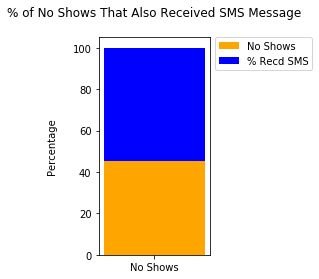

In [38]:
#Chart: Percent of No Shows that also received an SMS Message

# importing package
import matplotlib.pyplot as plt
 
# values
x = ['No Shows']
ybottom = [45.3]
ytop = [54.7]
 
# plot bars in stack manner
plt.figure(figsize=(2,4))
plt.bar(x, ybottom, color='orange')
plt.bar(x, ytop, bottom=ybottom, color='blue')
plt.title('% of No Shows That Also Received SMS Message\n')
plt.ylabel('Percentage\n')

# legend and placement
plt.legend(['% Recd SMS', 'No Shows '], bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

I found these discussions helpful

[Rounding a Percentage](https://stackoverflow.com/questions/22250692/rounding-a-percentage-in-python), [Counting 'Yes' in a Column](https://stackoverflow.com/questions/60240644/how-can-i-count-only-yes-entities-in-my-column-of-a-dataframe), 

[Stacked Bar Plot](https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/), [Legend Locations](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot/43439132#43439132)

Design: vertical stacked bar chart showing the total no shows and the percentage of no shows that received an SMS values in realation to each other. A blue-orange color palatte was used so the visual was color blind friendly.

Discussion: Created a visual showing the total number no shows (100% - blue) with and overlay of the percentage of no shows that received an SMS messages (45.3% - orange). 

#### Function: No Show Statistics

In [75]:
# FUNCTION: find daily no_show values
# Can be used with x = individual day or in FUNCTION weekday statistics for full summary

def no_show(x):
    # x = weekday
    
    # separate no_show y/n into two seprate df 
    ns_yes = len(df[(df['weekday'] == x) & (df['no_show'] == 'Yes')]) 
    ns_no = len(df[(df['weekday'] == x) & (df['no_show'] == 'No')]) 
    
    ns_total = ns_yes + ns_no
    ns_percent = ns_yes/ns_total
     
    print(('{} No Show statistics:\n    Appts made: {}\n    # No Shows: {}\n    Percent No Show: {:.1%}\n')
          .format(x, ns_total, ns_yes, ns_percent))   
    

#### Function: SMS Reminder Statistics

In [76]:
# FUNCTION: find daily SMS values
# Can be used with x = individual day or in FUNCTION weekday statistics for full summary

def sms_reminder(x):
    # x = weekday
    
    # total number of sms reminders sent
    total_sms = df_all_appt['sms_reminder'].value_counts()['Yes']
    
    # separate sms y/n into two seprate df 
    sms_yes = len(df[(df['weekday'] == x) & (df['sms_reminder'] == 'Yes')]) 
    sms_no = len(df[(df['weekday'] == x) & (df['sms_reminder'] == 'No')]) 
    
   # steps for df to determine no show appts that also received sms reminders, by day
    df_weekday_all = df[['sms_reminder', 'weekday','no_show']].copy()
    ns_sms_weekday1 = (df_weekday_all.loc[df_weekday_all['no_show'] == 'Yes']) 
    ns_sms_weekday2 = (ns_sms_weekday1.loc[ns_sms_weekday1['sms_reminder'] == 'Yes'])

    ns_sms_weekday = ns_sms_weekday2[['weekday', 'no_show']]['weekday']
    ns_sms_weekday_num= len(ns_sms_weekday2.loc[ns_sms_weekday2['weekday'] == x])
    
    # percent of weekday no shows that also received an sms reminder
    weekday_sms_perc = ns_sms_weekday_num / sms_yes
   
    
    print(('{} SMS statistics:\n    Daily SMS sent: {}\n    # No Show w/ SMS Reminder: {}\n    Percent No Shows w/ SMS Reminder: {:.1%}\n').format(x, sms_yes, ns_sms_weekday_num, weekday_sms_perc))   

#### Function: Weekday Statistics

In [77]:
#FUNCTION: weekday stats summary

def weekday_statistics():

    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

    for x in weekdays:
           no_show(x), sms_reminder(x)
    

I found this discussion helpful.  
[Why is my for loop returning none?](https://stackoverflow.com/questions/44275088/for-loop-returning-none)

In [78]:
#Summary : Full weekday statistics

weekday_statistics()

Monday No Show statistics:
    Appts made: 15108
    # No Shows: 3803
    Percent No Show: 25.2%

Monday SMS statistics:
    Daily SMS sent: 4794
    # No Show w/ SMS Reminder: 1600
    Percent No Shows w/ SMS Reminder: 33.4%

Tuesday No Show statistics:
    Appts made: 17089
    # No Shows: 4075
    Percent No Show: 23.8%

Tuesday SMS statistics:
    Daily SMS sent: 7164
    # No Show w/ SMS Reminder: 2387
    Percent No Shows w/ SMS Reminder: 33.3%

Wednesday No Show statistics:
    Appts made: 15936
    # No Shows: 3904
    Percent No Show: 24.5%

Wednesday SMS statistics:
    Daily SMS sent: 5768
    # No Show w/ SMS Reminder: 1925
    Percent No Shows w/ SMS Reminder: 33.4%

Thursday No Show statistics:
    Appts made: 11058
    # No Shows: 2660
    Percent No Show: 24.1%

Thursday SMS statistics:
    Daily SMS sent: 3271
    # No Show w/ SMS Reminder: 1122
    Percent No Shows w/ SMS Reminder: 34.3%

Friday No Show statistics:
    Appts made: 12598
    # No Shows: 3215
    Percen

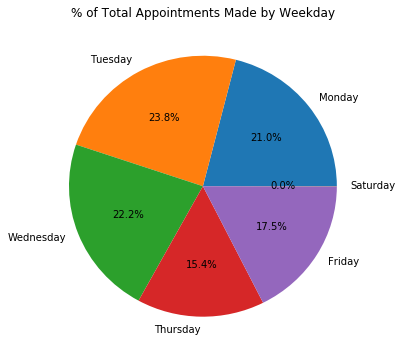

In [39]:
#Chart: Pie - percentage of total appointments made by weekday

# values
labels = 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'
sizes = [15108, 17089, 15936, 11058, 12598, 28]# quantity of the whole

# plot
fig, axs = plt.subplots(figsize = [6,6])

plt.title('% of Total Appointments Made by Weekday')
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show() 

Design: pie chart showing the breakdown of weekday appointments by percentage. A flat pie chart was used so that the slices would be an accurate representation of percentages. 

Discussion: Created a visual showing the breakdown of weekday appointments by percentage. Saturday does have a very small value (<0.1%) which translated to 0.0% on the chart. 

I found these discussions helpful:

[Matplotlib Pie Chart](https://www.w3schools.com/python/matplotlib_pie_charts.asp), [Set Size of Subplot](https://stackoverflow.com/questions/41530975/set-size-of-subplot-in-matplotlib)


### Q1: Which day(s) are clients more likely to be a no show?

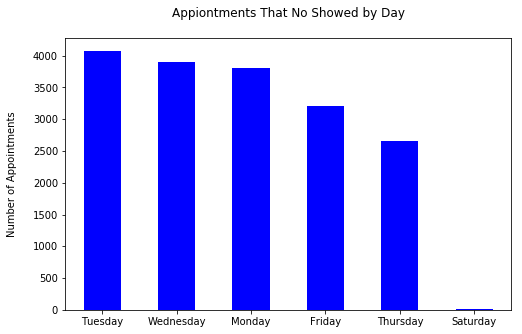

In [45]:
# Chart: Total Appointments that No Showed by day

# values
stats= ['Tuesday', 'Wednesday', 'Monday', 'Friday', 'Thursday', 'Saturday']
values = [4075, 3904, 3803, 3215, 2660, 6]

# plot 
s = pd.Series(values, index=stats)
plt.ylabel('Number of Appointments\n')
s.plot(kind='bar', title = 'Appiontments That No Showed by Day\n', figsize= [8,5], rot=0, color='blue');

Design: vertical bar chart showing the number of appointments by day that no showed. Values are arranged greatest to least (L-R) for easy reading. A blue color palatte was used so the visual was color blind friendly.

Discussion: Created a visual showing the number of appointments by day that no showed. The values are arranged greatest to least in the following weekday order: Tuesday (w/4075), Wednesday, Monday, Friday, Thursday and ending with Saturday (w/6).

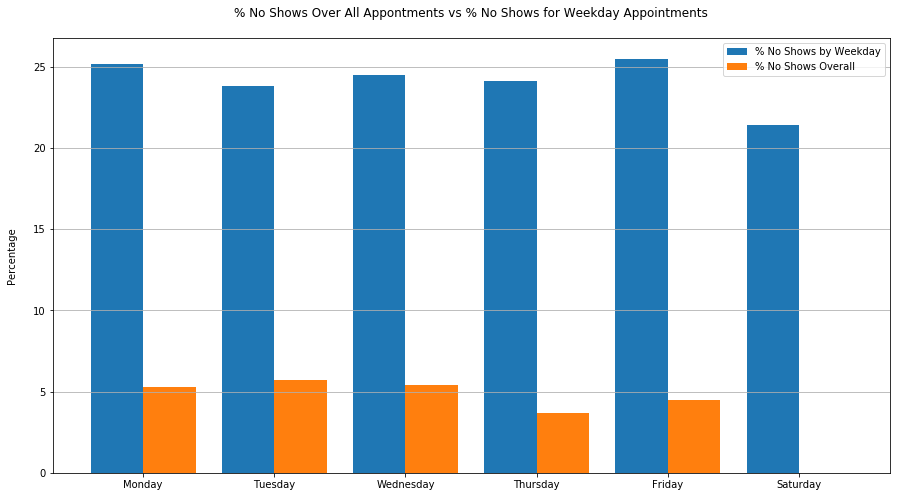

In [47]:
# Chart: Compares No Show percentage over all appointments and weekday appointments
  
# create data
x = np.arange(6)
total_wkd_ns = [5.3, 5.7, 5.4, 3.7, 4.5, 0] # no shows / total appointments = % No Shows Overall
ns_by_wkd = [25.2, 23.8, 24.5, 24.1, 25.5, 21.4] # no shows / total appointments that day = % No Shows Weekday
width = 0.4
  
# plot data in grouped manner of bar type
plt.figure(figsize=(15,8))
plt.grid(axis = 'y')
plt.xticks(x, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel('Percentage\n')
plt.bar(x-0.2, ns_by_wkd, width)
plt.bar(x+0.2, total_wkd_ns, width)
plt.title('% No Shows Over All Appontments vs % No Shows for Weekday Appointments\n')
plt.legend(['% No Shows by Weekday','% No Shows Overall']);


Design: vertical grouped bar chart showing the percentage for overall no shows in relation to the percentage of no shows by weekday. They are showing in a Mon-Sat order since this is an overall visual and not realted greatest/least. A blue-orange color palatte was used so the visual was color blind friendly. 

Based simply on the number of no shows, Tuesday has the higher percentage of no shows when compared to the over all number of appointments (orange). However, a comparison of the percentage of now shows per day would be a more accurate measure. Friday has the highest no show percentage when comparing the numer of no shows to the number of daily appointments (blue). 

Conclusion:

No show appointments are more likely to occur on Fridays.

### Q2: Is there a correlation betwen no shows and not receiving an SMS reminder?

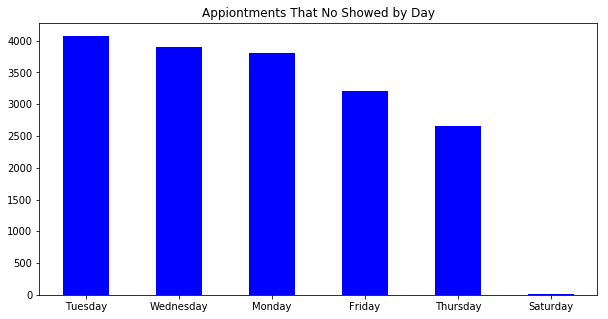

In [82]:
#Compare no shows wi# Chart: Total Appointments that No Showed by day

# values
stats= ['Tuesday', 'Wednesday', 'Monday', 'Friday', 'Thursday', 'Saturday']
values = [4075, 3904, 3803, 3215, 2660, 6]

# plot 
s = pd.Series(values, index=stats)
s.plot(kind='bar', title = 'Appiontments That No Showed by Day', figsize= [10,5], rot=0, color='blue');


Design: vertical bar chart showing the number of appointments by day that no showed. Values are arranged greatest to least (L-R) for easy reading. A blue color palatte was used so the visual was color blind friendly.

Discussion: Included the Appointments That No Showed by Day chart again since we are continuing to deal witih no shows. The visual was created to show the number of appointments by day that no showed. The values are arranged greatest to least in the following weekday order: Tuesday (w/4075), Wednesday, Monday, Friday, Thursday and ending with Saturday (w/6).

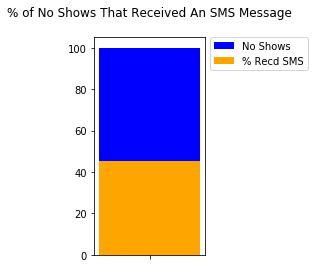

In [83]:
#Chart: Percent of No Shows that also received an SMS Message

# importing package
import matplotlib.pyplot as plt
 
# values
x = [''] #blank X lable; not needed with legened. removing showed default numbers as X axis.
ytop = [54.7]
ybottom = [45.3]

 
# plot bars in stack manner
plt.figure(figsize=(2,4))
plt.bar(x, ytop, bottom=ybottom, color='blue')
plt.bar(x, ybottom, color='orange')
plt.title('% of No Shows That Received An SMS Message\n')


# legend and placement
plt.legend(['No Shows', '% Recd SMS'], bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

Design: vertical stacked bar chart showing the total no shows and the percentage of no shows that received an SMS values in realation to each other. A blue-orange color palatte was used so the visual was color blind friendly.

Discussion: Created a visual showing the total number no shows (100% - blue) with and overlay of the percentage of no shows that received an SMS messages (45.3% - orange).

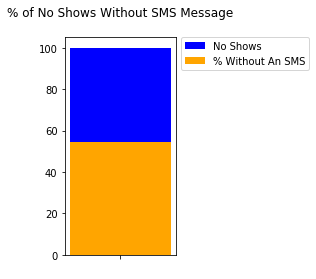

In [84]:
#Chart: Percent of No Shows that did not receive an SMS Message

# importing package
import matplotlib.pyplot as plt
 
# values
x = [' '] #blank X lable; not needed with legened. removing showed default numbers as X axis.
ytop = [45.3]
ybottom = [54.7]

 
# plot bars in stack manner
plt.figure(figsize=(2,4))
plt.bar(x, ytop, bottom=ybottom, color='blue')
plt.bar(x, ybottom, color='orange')
plt.title('% of No Shows Without SMS Message\n')


# legend and placement
plt.legend(['No Shows', '% Without An SMS'], bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

Design: vertical stacked bar chart showing the total no shows and the percentage of no shows that received an SMS values in realation to each other. A blue-orange color palatte was used so the visual was color blind friendly.

Discussion: Created a visual showing the total number no shows (100% - blue) with and overlay of the percentage of no shows that did not received an SMS messages (54.7% - orange).

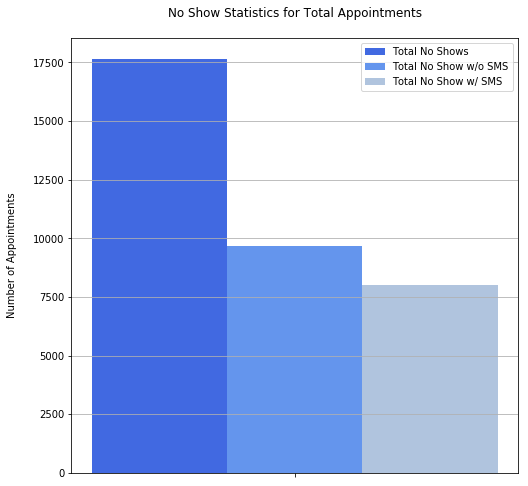

In [49]:
# create data
x = np.arange(1)
total_ns = [17663]
total_ns_no_sms = [9660]
total_ns_sms = [8003]

width = 0.2
  
# plot data in grouped manner of bar type
plt.figure(figsize=(8,8))
plt.xticks(x, [''])
plt.ylabel('Number of Appointments\n')
plt.grid(axis = 'y')
plt.bar(x - 0.2, total_ns, width, color= 'royalblue')
plt.bar(x, total_ns_no_sms, width, color='cornflowerblue')
plt.bar(x + 0.2, total_ns_sms, width, color='lightsteelblue')

plt.title('No Show Statistics for Total Appointments\n')
plt.legend(['Total No Shows', 'Total No Show w/o SMS', 'Total No Show w/ SMS']);

Design: vertical bar chart showing total no show appointments and their breakdown into no show without SMS messages and with SMS messages. The values are arranged greatest to least (L-R) for easy reading. An X axis label was not created since it would be redundant information due to the legend describing what each column/color represents. A blue color palatte was used so the visual was color blind friendly.

There were a total of 17,663 no shows. Of those, 8003 received an SMS reminder while 9660 did not receive one. 

Conclusion:

We can see that there is a possible correlation between receivnig an SMS reminder and no show appointments since no shows with SMS reminder had the smallest number. 

<a id='conclusions'></a>
### Conclusions
Q1: Which day(s) are clients more likely to be a no show?

Conclusion:

No show appointments are more likely to occur on Fridays.

Q2: Is there a correlation betwen no shows and not receiving an SMS reminder?

Conclusion:

We can see that there is a possible correlation between receivnig an SMS reminder and no show appointments since no shows with SMS reminder had the smallest number. 


### Limitations

I discovered a limitation within the dataset while exploring the correlation between receiving an SMS message and no shows. Without a larger sample, the best that can be concluded is a possible correlcation between the two. 

There is not enough data available to make definitive cause and effect conclusion. We would also need addition information that is not supplied with the dataset. I would suggest following up with a supplemental questionaire asking if patients about the SMS remiders and their impact on whether or not they no showed. 